 ### Sentiment analysis on skin care products

# *Dictionary-based sentiment analysis (1/2)*

*Dictionary-based sentiment analysis uses predefined list of positive and negative words to measure the sentiment score of a text.*

##  1. Load the corpus we created in the previous stage (sampling_database)


In [1]:
import pandas as pd

In [2]:
df_small_corpus  = pd.read_csv('small_corpus.csv')

In [3]:
df_small_corpus.head()

,reviews,rating
0,I got soap in a bottle of what is supposted to...,1.0
1,I used this on my kids and my fair-skinned hus...,1.0
2,After months of emergency use simply because m...,1.0
3,"The product is a facial cream, but the picture...",1.0
4,I have been buying olive derived 100% Squalane...,1.0


##  2. Get the opinion lexicon 


*We use opinion lexicon from nltk corpus package.*

In [4]:
import nltk
from nltk.corpus import opinion_lexicon

In [5]:
pos_words = set(opinion_lexicon.positive())
neg_words = set(opinion_lexicon.negative())

*Let's check out the length of the each list.*

In [6]:
len(pos_words), len(neg_words)

(2006, 4783)

##  3. Calculate the sentiment score 


*We score each review based on the number of the positive or negative words it includes. 
First we need to tokenize the reviews with the function tokenize(). Since the sentiment lexicon includes different form of words (such as love, loves) we won't lemmatize the tokens here. The sentiment_score() function returns sentiment scores between -1.0 and +1.0 for the given review. -1.0 shows very negative and +1.0 shows very positive.*

*Calculating sentiment scores for each review.*

In [16]:
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

#Tokenizes text and remove non-alphabetic tokens as well as stopwords.  
def tokenize(review):
    sentences = sent_tokenize(review)
    stop_words = stopwords.words('english')
    tokens = []
    for sent in sentences:
        sent = sent.lower()
        words = word_tokenize(sent)
        tokens += [word for word in words if (word.isalpha() and word not in stop_words)]
    return tokens
    

def sentiment_score(review):
    tokens  = tokenize(review)
    pos = 0
    neg = 0
    for word in tokens:
        if word in pos_words:
            pos += 1
        elif word in neg_words:
            neg += 1
    if len(tokens) > 0:
        return (pos - neg) / len(tokens)
    return 0

In [17]:
sentiment_scores  = []
reviews  = list(df_small_corpus.reviews)
for review in reviews:
    sentiment_scores.append(sentiment_score(review))

##  4. Add the sentiment scores to the data frame 

*Lets add the sentiment_scores into the df_small_corpus.*

In [10]:
df_small_corpus ['dic_based_score'] = sentiment_scores

In [11]:
df_small_corpus.head()

,reviews,rating,dic_based_score
0,I got soap in a bottle of what is supposted to...,1.0,0.000000
1,I used this on my kids and my fair-skinned hus...,1.0,0.038462
2,After months of emergency use simply because m...,1.0,0.028986
3,"The product is a facial cream, but the picture...",1.0,-0.031250
4,I have been buying olive derived 100% Squalane...,1.0,0.065789


##  4. Analysis


### *4.1 Distribution*

*Now let's see the distribution of the dictionary-based sentiment scores.*

(array([2.000e+00, 1.000e+00, 3.000e+00, 6.500e+01, 8.030e+02, 3.208e+03,
        3.790e+02, 2.900e+01, 1.000e+00, 9.000e+00]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

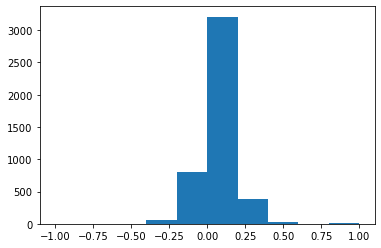

In [12]:
import matplotlib.pyplot as plt
plt.hist(df_small_corpus.dic_based_score)

*We see that sentiment scores are more concentrated in the middle and right which means reviews scored more as neutral and positive.*

### *4.2 Correlation*

*Let's see if there is any relationship between the ratings and the dictionary-based sentiment scores.*

Text(0, 0.5, 'Dictionary-based score')

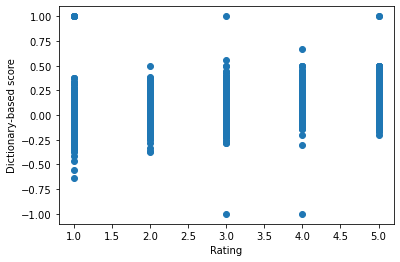

In [13]:
plt.scatter(df_small_corpus.rating, df_small_corpus.dic_based_score)
plt.xlabel("Rating")
plt.ylabel("Dictionary-based score")

*We don't see any relationship from the above graph. The scores widely range for all the rating types. We expect very weak or no correllation between these two. The code below shows the pearson correlation coefficient between ratings and dictionary-based scores.*

In [14]:
df_small_corpus.rating.corr(df_small_corpus.dic_based_score)

0.3281536284169099

*The correlation coefficients between 0.3 and 0.5 indicate low correlation.* 

### *4.3 Exploring the data*

*Let's look into some of the reviews that has rating >=4 but got the sentiment score <= -0.2.*

In [15]:
for i in range(len(df_small_corpus)):
    if (df_small_corpus.rating[i] >= 4 and df_small_corpus.dic_based_score[i] <= -0.2):
        print(df_small_corpus.iloc[i].reviews)

but too expensive
seems to help with a chronic problem with my hands. At this time I am skeptical of everything, but this actual does help for now
I live in cold weather country and develop fissures on my fingers in the winter.  This product has prevented this painful condition.  It is a bit greasy but effective.
It's exactly what you find off the shelf in store, without the hassle of finding which stores have it (more difficult than you'd think).


*Let's look into some of the reviews that has rating <=2 but got the sentiment score over 0.2.*

In [55]:
for i in range(len(df_small_corpus)):
    if (df_small_corpus.rating[i] <= 2 and df_small_corpus.dic_based_score[i] > 0.2):
        print(df_small_corpus.iloc[i].reviews)

well, same with HOODIA, no difference at all.  i gained weight instead. i will try another brand.  slim quick brand doesn't work with me.
I was excited to get this product,  but it doesn't seem to do anything but leave a whitish, shiny residue under my eyes that I have to wipe off.  I just don't understand some of the other reviews.  You can't put make-up over top of the crud that it leaves behind. And how well can it work when I have to wipe it back off?
Ended up selling this at a garage sale for $2.  It didn't work very well at all.  Would not recommend.
I have oily skin, this cleanser is not strong enough to get rid of pimples.not working for me, maybe it is good for someone who has very minor breakouts.
Blue appears to be black when it is dry. I was not pleased that it was not like the color portrayed.
I didn't realize when I bought it that this is a fizzy Alka Seltzer like product. Since I don't like Alka Seltzer I don't like this product.
I don't know if this oil is any good, but

*A review such as "Ended up selling this at a garage sale for $2.  It didn't work very well at all.  Would not recommend.
" got scores above 0.2, because it includes the words 'work' and 'recommend' eventhough they followed 'not'. This problem can be solved by 'Negation handling'.*

### *4.4 Negation handling*

*We use mark_negation from nltk which appends _NEG suffix to words that appear in the scope between a negation and punctuation mark.*

*Let's modify the tokenize() and sentiment_score() functions to handle negations.*


In [56]:
import nltk.sentiment.util

#Returns true if a word is alphabetic or inludes _NEG mark. 
def is_alpha_or_NEG(word):
    if word.find('_NEG') != -1 :
        return True
    return word.isalpha()

#Tokenizes text and remove non-alphabetic tokens as well as stopwords.  
def tokenize(review, negation=False):
    stop_words = stopwords.words('english')
    sentences = sent_tokenize(review)
    tokens = []
    for sent in sentences:
        sent = sent.lower()
        words = word_tokenize(sent)
        if negation:
            with_negation = nltk.sentiment.util.mark_negation(words)
            tokens += [word for word in with_negation if (is_alpha_or_NEG(word) and word not in stop_words)]
        else:
            tokens += [word for word in words if (word.isalpha() and word not in stop_words)]
    return tokens

#Calculates sentiment score for a review based on the counts of the positive and negative words it includes.
def sentiment_score(review, negation=False):
    tokens  = tokenize(review, negation)
    pos = 0
    neg = 0
    for word in tokens:
        if negation and word.find('_NEG') != -1:
            mark_word = word.replace('_NEG', '')
            if mark_word in pos_words:
                neg += 1
            elif mark_word in neg_words:
                pos += 1
            continue
        if word in pos_words:
            pos += 1
        elif word in neg_words:
            neg += 1
    if len(tokens) > 0:
        return (pos - neg) / len(tokens)
    return 0

*Let's see how much the negation handling helps the whole dataset in the next Section (Dictionary-based sentiment analysis (1/2)*